In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("possible_values.csv", names=["Possibilities"])

In [9]:
df[["Factor", "Entity"]] = df["Possibilities"].str.split(":", 1, expand=True)
del df["Possibilities"]
df

,Factor,Entity
0,stay,DEC-FEB
1,stay,JUN-AUG
2,stay,MAR-MAY
3,stay,SEP-NOV
4,length_of_stay,1-7
...,...,...
388,room_type,cheap beach
389,room_type,standard
390,room_type,standard room
391,room_type,studio


In [10]:
names = df.drop_duplicates("Factor")["Factor"].values.tolist()
names

['stay', 'length_of_stay', 'review_group', 'country', 'room_type']

In [11]:
factor_entities = df.groupby('Factor')["Entity"].apply(list).to_dict()
factor_entities

{'country': ['Antarctica',
  'Argentina',
  'Australia',
  'Austria',
  'Bahrain',
  'Bangladesh',
  'Belarus',
  'Belgium',
  'Brazil',
  'Bulgaria',
  'Cambodia',
  'Canada',
  'China',
  'Colombia',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Egypt',
  'Estonia',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Hong Kong',
  'Hungary',
  'India',
  'Indonesia',
  'Iran (Islamic Republic of)',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Jordan',
  'Kazakhstan',
  'Kenya',
  'Korea (Republic of)',
  'Kuwait',
  "Lao People's Democratic Republic",
  'Latvia',
  'Lebanon',
  'Luxembourg',
  'Macao',
  'Malaysia',
  'Malta',
  'Mexico',
  'Morocco',
  'Myanmar',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Norway',
  'Oman',
  'Pakistan',
  'Peru',
  'Philippines',
  'Poland',
  'Portugal',
  'Qatar',
  'Romania',
  'Russian Federation',
  'Saudi Arabia',
  'Senegal',
  'Serbia',
  'Singapore',
  'Slovakia',
  'South Africa',
  'Spain',
  'Sri L

In [12]:
factor_entities["review_group"]

['Business', 'Couple', 'Family', 'Group', 'Solo']

In [2]:
import graphviz
import pathlib
from anytree import AnyNode, RenderTree
from anytree.exporter import JsonExporter, UniqueDotExporter

In [13]:
root = AnyNode(id="root", name="Root")
factor_lv1 = list(map(lambda x: AnyNode(id="x" + str(x), name=x, parent=root), factor_entities["review_group"]))
for factor in factor_lv1:
    list(map(lambda x: AnyNode(id="x" + factor.name, name=x, parent=factor), factor_entities["stay"]))

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

Root
├── Business
│   ├── DEC-FEB
│   ├── JUN-AUG
│   ├── MAR-MAY
│   └── SEP-NOV
├── Couple
│   ├── DEC-FEB
│   ├── JUN-AUG
│   ├── MAR-MAY
│   └── SEP-NOV
├── Family
│   ├── DEC-FEB
│   ├── JUN-AUG
│   ├── MAR-MAY
│   └── SEP-NOV
├── Group
│   ├── DEC-FEB
│   ├── JUN-AUG
│   ├── MAR-MAY
│   └── SEP-NOV
└── Solo
    ├── DEC-FEB
    ├── JUN-AUG
    ├── MAR-MAY
    └── SEP-NOV


In [14]:
root.is_root

True

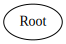

In [4]:
UniqueDotExporter(root, options=["rankdir=LR;"]).to_dotfile("d-tree.dot")
filepath = pathlib.Path('d-tree.dot')
graphviz.Source.from_file('d-tree.dot')

In [17]:
UniqueDotExporter(root, options=["rankdir=LR;"]).to_picture("d-tree.png")

In [5]:
exporter = JsonExporter(indent=2, sort_keys=True)
print(exporter.export(root))

{
  "id": "root",
  "name": "Root"
}


In [2]:
from tree_from_assoc_rules import accumulate_node, export_json
from anytree import AnyNode

root = AnyNode(id="root", name="Root")
factors = ['review_group', 'length_of_stay', 'stay']
# factors = ['review_group']
accumulate_node(root, factors)
export_json(root)

0 review_group ['review_group', 'length_of_stay', 'stay'] ['length_of_stay', 'stay']


'{\n  "id": "root",\n  "level": 0,\n  "name": "Root",\n  "weight": ""\n}'

In [1]:
factors = ['review_group', 'length_of_stay', 'stay']
weights = [3, 2, 1]

# [x for _, x in sorted(zip(weight, factors))]
[weight for (weight, factor) in sorted(zip(weights, factors), key=lambda pair: pair[0])]

[1, 2, 3]

In [20]:
review = {
    "id": "someId", "author": "Ahmed Yasak",
    "title": "Away from the bustle",
    "text": """Located at the southeastern corner of Phuket, Cape Panwa was pretty quiet
                        during our visit. Sri Panwa was also not very occupied - there were much
                        more staff than visitors.
                        Stayed in the Pool Suite. Room was comfortable, with an iPod connected to
                        speakers available with decent music selection. Toiletries quite complete.
                        Staff were very, very courteous. 5/5 for the staff!""",
    "date": "2015-09-07",
}
x = {"positives": [review], "neutrals": [], "negatives": []}
print(x)

{'positives': [{'id': 'someId', 'author': 'Ahmed Yasak', 'title': 'Away from the bustle', 'text': 'Located at the southeastern corner of Phuket, Cape Panwa was pretty quiet\n                        during our visit. Sri Panwa was also not very occupied - there were much\n                        more staff than visitors.\n                        Stayed in the Pool Suite. Room was comfortable, with an iPod connected to\n                        speakers available with decent music selection. Toiletries quite complete.\n                        Staff were very, very courteous. 5/5 for the staff!', 'date': '2015-09-07'}], 'neutrals': [], 'negatives': []}


In [25]:
x = ["stay:DEC-FEB", "length_of_stay:1-7", "review_group:Couple"]
y = x[0]
[a,b] = y.split(":")
print(a)
print(b)

stay
DEC-FEB
